# Öznitelik Ölçeklendirme
* Özellik ölçeklendirme , bağımsız değişkenlerin aralığını veya verilerin özelliklerini normalleştirmek için kullanılan bir yöntemdir.
* Gelen veri işleme , aynı zamanda veri normalleştirme olarak bilinir ve genel olarak adım önişleme veri sırasında gerçekleştirilir.

## 1.Standardizasyon
* Standardizasyonun (veya Z Puanı Normalizasyonunun) sonucu, özelliklerin standart bir normal dağılım özelliklerine sahip olacak şekilde yeniden ölçeklendirilmesidir.
* μ:ortalama
* σ:standart sapma

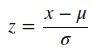

### `numpy` kütüphanesini kullanarak kendimiz bir veri seti oluşturalım.

In [1]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [2]:
from sklearn import preprocessing

In [3]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

## 2.Normalizasyon
* Normalleştirme dediğimiz yöntem değişkenlerin 0 ve 1 arasındaki değerlere atanmasıdır.

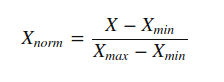

In [4]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

# Kategorik Değişken Dönüşümleri


* Makine öğrenmesi algoritmalarında kullanılan veri setlerindeki kategorik sınıflara sahip özniteliklerin, sayısal veri tipi ile ifade edilmesi için label encoding ve one-hot encoding işlemleri gerçekleştirilebilir.

## 1. Label Encoding
* Bir özniteliğe ait kategorik sınıflar 0,1,2,3... gibi sayısal değerler ile ifade edilir.
* Bu bölümde seaborn kütüphanesinde bulunan `tips` veri setini kullanacağız.
* `tips` veri setinde `sex` değişkeninde `female` ve `male` sınıflarını nümerik değerlere(0,1) çevirebiliriz.
* Kategorik Değişken Dönüşümler için `sklearn` kütüphanesini kullanacağız.

In [8]:
import seaborn as sns
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder().fit_transform(tips["sex"])
lbe

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

* Label encoding dönüşümünü veri setinde görmek için yeni bir sütun oluşturalım.

In [13]:
tips["new_sex"] = LabelEncoder().fit_transform(tips["sex"])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


### Birde `day` değişkeni üzerinde Label Encoding dönüşümünü gerçekleştirelim

In [15]:
tips["new_day"]=LabelEncoder().fit_transform(tips["day"])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2


* `day` değişkeninin 7 sınıftan oluştuğu görülmektedir.
* Sınıflar sırasıyla 0,1,2,....6 olarak kodlanmıştır.
* Bu noktada sınıflar arasında bir sıralamanın olup olamdığı önem kazanmaktadır.
* Makine öğrenmesi algoritmalarının `Tue(Salı)` sınıfını `Mon(Pazartesi)` ve `Wed(Çarşamba)` sınıfının ortlaması olarak yanlış anlaması mümkündür.
* Bu yüzden label encoding daha çok aralarında sayısal bir sıralama ilişkisi bulunan sınıflar(yüksek,orta,düşük vb.) arasında olması tercih edilir.

## 2. One-Hot Encoding

* Label encoding ile yaşanan "algoritmaların snıflarının sayısal büyüklüklerine göre ilişkilendirilmesi" sorununa,one-hot encoding dönüşümü ile çözüm bulunabilir.
* One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir.
* Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir.
* Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışında ki tüm değerleri sıfır  olan bir ikili vektör olarak temsil edilir.

In [16]:
from sklearn.preprocessing import OneHotEncoder

* Aşağıdaki kod sonucunda sınııf sayısı kadar yeni değişken oluşmuştur.
* Örneğin 1. gözlemde sex değişkeni `Male` sınıfı olduğu için `sex_Male` 1 değerini `sex_Female` 'de 0 değerini almıştır.
* Burada diikat edilmesini gereken dummy değişken tuzağının oluşmasıdır. 

### Dummy Değişken Tuzağı
* Eğer veri seti içerisindeki değişkenlere bir dönüşüm uygulandığında eğer bu dönüşüm sonucunda oluşan yeni değişkenler birbirleri üzerinde oluşturulabiliyorsa bu duruma dummy değişken tuzağı denir.
* Yani, bir değişkeni ifade eden başka bir değişken var ise bu duruma dummy değişken tuzağı denir.
* `sex_Male` ve `sex_Female` değişkenleri aynı bilgiyi içermektedir.

In [20]:
tips_one_hot = pd.get_dummies(tips, columns = ["sex"], prefix = ["sex"])
tips_one_hot.head()

,total_bill,tip,smoker,day,time,size,new_sex,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,2,0,1


* One-hot encoding dönüşümünde kategorik değişkenin sınıf sayısı artıkça değişkenlerin birbirleri üzerinden oluşturulması güçleşir.

In [21]:
tips_one_hot=pd.get_dummies(tips,columns=["day"],prefix=["day"])
tips_one_hot.head()

,total_bill,tip,sex,smoker,time,size,new_sex,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,2,0,0,0,1


# KAYNAKLAR
* https://www.linkedin.com/pulse/veri-bilimi-notları-4-özellik-ölçeklendirme-abdullah-faruk-çi̇ftler/
* https://veribilimcisi.com/2017/07/18/ozellik-olcekleme-ve-normallestirme-nedir-feature-scaling-and-normalization/